In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir="Data"

In [3]:
img_height, img_width = 180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 576 files for training.


2022-12-16 21:33:28.930243: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 144 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['Cricket Field', 'Forest Land', 'Grass', 'Hard Sand', 'Road', 'Tiles']

In [6]:
densenet_model = Sequential()

pretrained_model = tf.keras.applications.DenseNet201(include_top=False,weights="imagenet",
                                                     input_shape=(180,180,3),pooling="avg",
                                                     classes=6)
for layer in pretrained_model.layers:
    layer.trainable=False
    
densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512,activation="relu"))
densenet_model.add(Dense(6,activation="softmax"))                                         

74850304/74836368 [==============================] - 38s 1us/step


In [7]:
densenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 module_wrapper (ModuleWrapp  (None, 1920)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              983552    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 19,308,614
Trainable params: 986,630
Non-trainable params: 18,321,984
______________________________________

In [8]:
densenet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.losses.BinaryCrossentropy(),
                     metrics=["accuracy"])

In [9]:
epochs=10
history = densenet_model.fit(train_ds,
                           validation_data = val_ds,
                           epochs=epochs)

Epoch 1/10
18/18 [==============================] - 114s 5s/step - loss: 0.2967 - accuracy: 0.8125 - val_loss: 0.0474 - val_accuracy: 0.9722
Epoch 2/10
18/18 [==============================] - 97s 5s/step - loss: 0.0338 - accuracy: 0.9722 - val_loss: 0.0368 - val_accuracy: 0.9653
Epoch 3/10
18/18 [==============================] - 123s 7s/step - loss: 0.0149 - accuracy: 0.9913 - val_loss: 0.0173 - val_accuracy: 0.9861
Epoch 4/10
18/18 [==============================] - 109s 6s/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0106 - val_accuracy: 0.9931
Epoch 5/10
18/18 [==============================] - 92s 5s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9931
Epoch 6/10
18/18 [==============================] - 90s 5s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9931
Epoch 7/10
18/18 [==============================] - 90s 5s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9931
Epoch 8/10
18/18 

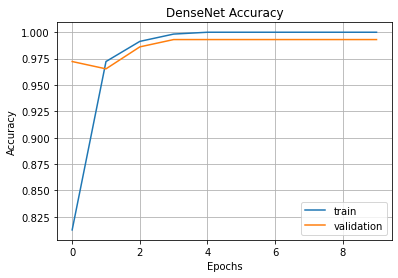

In [10]:
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.title("DenseNet Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("Densenet-accuracy.png")
plt.show()


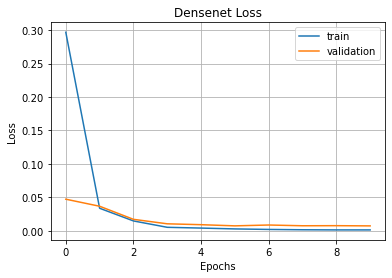

In [11]:
fig1 = plt.gcf()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.title("Densenet Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("Densenet-loss.png")
plt.show()



In [13]:
np.mean(history.history["accuracy"])

0.9774305522441864